In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('Crop_recommendation.csv')

In [4]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
data.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [6]:
data.shape

(2200, 8)

In [8]:
data.size

17600

In [7]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [9]:
data.duplicated().sum()

0

In [10]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


N - ratio of Nitrogen content in soil.

P - ratio of Phosphorous content in soil.

K - ratio of Potassium content in soil.

temperature - temperature in degree Celsius.

humidity - relative humidity in %.

ph - ph value of the soil.

rainfall - rainfall in mm.


# EDA

In [19]:
data.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<AxesSubplot:>

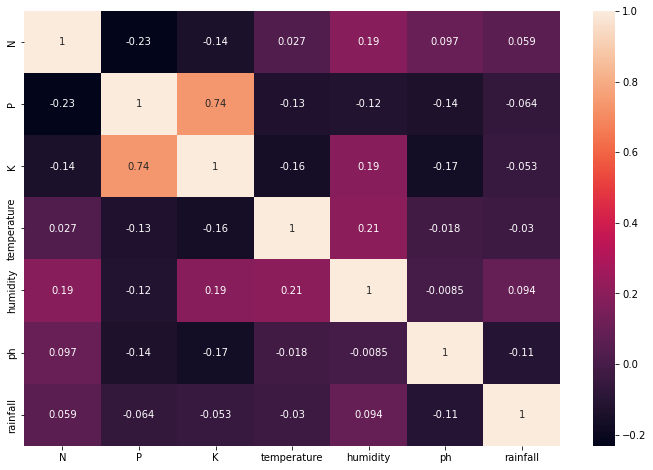

In [26]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True)

In [12]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [14]:
data.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [15]:
data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [16]:
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

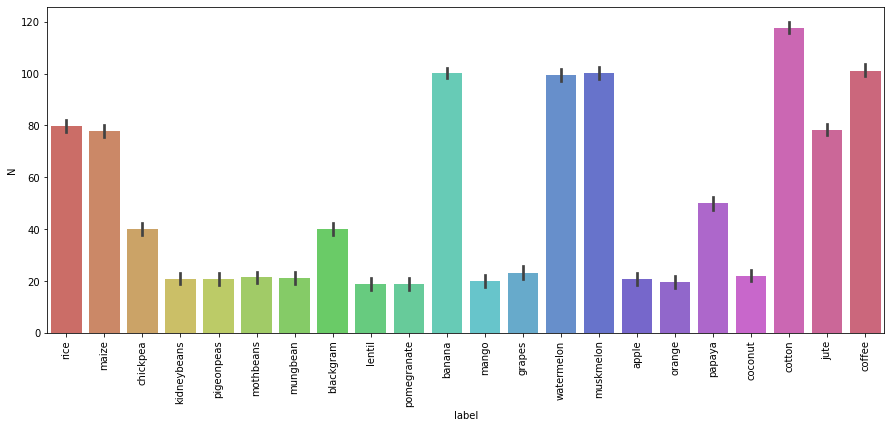

In [18]:
plt.figure(figsize=(15,6))
sns.barplot(y = 'N', x = 'label', data=data, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

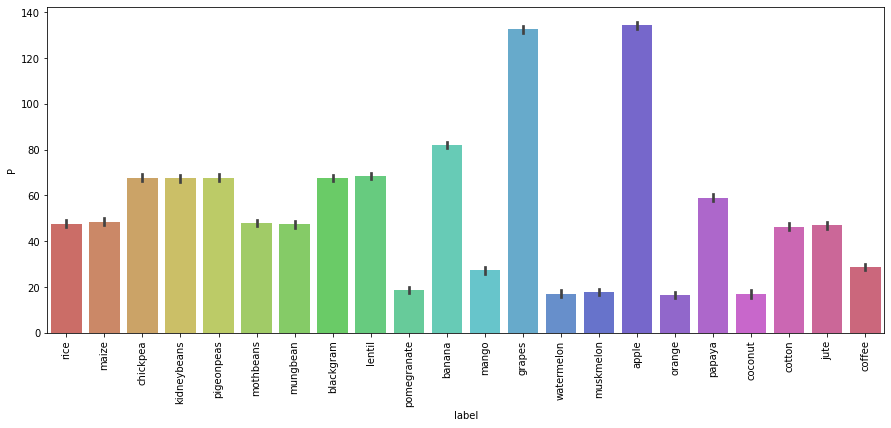

In [20]:
plt.figure(figsize=(15,6))
sns.barplot(y = 'P', x = 'label', data=data, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

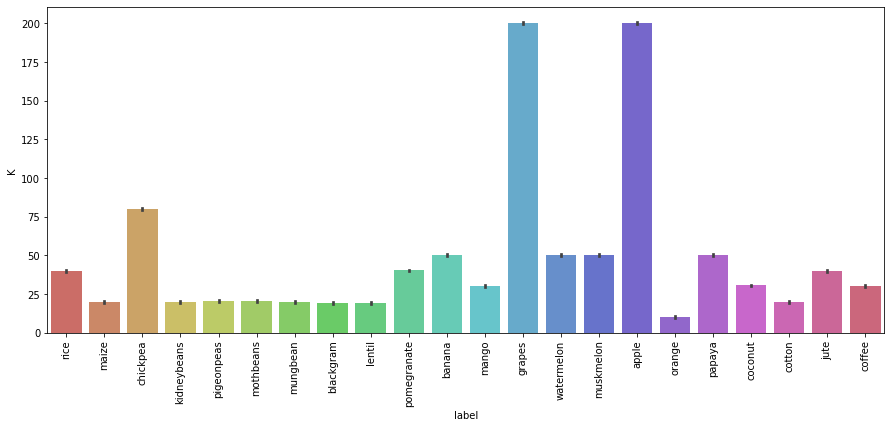

In [21]:
plt.figure(figsize=(15,6))
sns.barplot(y = 'K', x = 'label', data=data, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

# Splitting data into X and y

In [34]:
X = data.drop('label', axis=1)
y = data['label']

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

# Decision Tree Classifier

In [36]:
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier(criterion='entropy', random_state=42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [38]:
y_pred=classifier.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score
print("Decision Tree Model accuracy score: ",accuracy_score(y_true=y_test,y_pred=classifier.predict(X_test)))

Decision Tree Model accuracy score:  0.9818181818181818


In [49]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        34
      banana       0.96      1.00      0.98        26
   blackgram       1.00      1.00      1.00        26
    chickpea       1.00      0.97      0.99        34
     coconut       1.00      1.00      1.00        33
      coffee       1.00      1.00      1.00        30
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        23
        jute       0.83      0.88      0.86        34
 kidneybeans       1.00      1.00      1.00        36
      lentil       0.96      1.00      0.98        22
       maize       1.00      1.00      1.00        26
       mango       1.00      1.00      1.00        32
   mothbeans       1.00      0.97      0.99        34
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        24
      orange       1.00      1.00      1.00        25
      papaya       1.00    

# Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf= RandomForestClassifier(n_estimators= 10, criterion="entropy")
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [51]:
y_pred= classifier_rf.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score
print("Random Forest Model accuracy score: ",accuracy_score(y_true=y_test,y_pred=classifier_rf.predict(X_test)))

Random Forest Model accuracy score:  0.9878787878787879


In [54]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        34
      banana       1.00      1.00      1.00        26
   blackgram       0.96      1.00      0.98        26
    chickpea       1.00      1.00      1.00        34
     coconut       0.94      1.00      0.97        33
      coffee       1.00      1.00      1.00        30
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        23
        jute       0.87      0.97      0.92        34
 kidneybeans       1.00      1.00      1.00        36
      lentil       1.00      1.00      1.00        22
       maize       1.00      1.00      1.00        26
       mango       1.00      1.00      1.00        32
   mothbeans       1.00      0.97      0.99        34
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        24
      orange       1.00      1.00      1.00        25
      papaya       1.00    

# Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state = 42)
classifier_lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [57]:
y_pred = classifier_lr.predict(X_test)

In [58]:
from sklearn.metrics import accuracy_score
print('Logistic Regression Model accuracy score:',accuracy_score(y_true=y_test,y_pred=classifier_lr.predict(X_test)))

Logistic Regression Model accuracy score: 0.946969696969697


In [59]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        34
      banana       0.96      1.00      0.98        26
   blackgram       0.76      0.85      0.80        26
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        33
      coffee       0.97      1.00      0.98        30
      cotton       0.87      0.96      0.92        28
      grapes       1.00      1.00      1.00        23
        jute       0.83      0.88      0.86        34
 kidneybeans       0.97      0.97      0.97        36
      lentil       0.91      0.91      0.91        22
       maize       0.95      0.77      0.85        26
       mango       0.97      1.00      0.98        32
   mothbeans       0.90      0.82      0.86        34
    mungbean       0.94      1.00      0.97        30
   muskmelon       1.00      1.00      1.00        24
      orange       1.00      1.00      1.00        25
      papaya       0.94    